In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler,OneHotEncoder,LabelEncoder,OrdinalEncoder

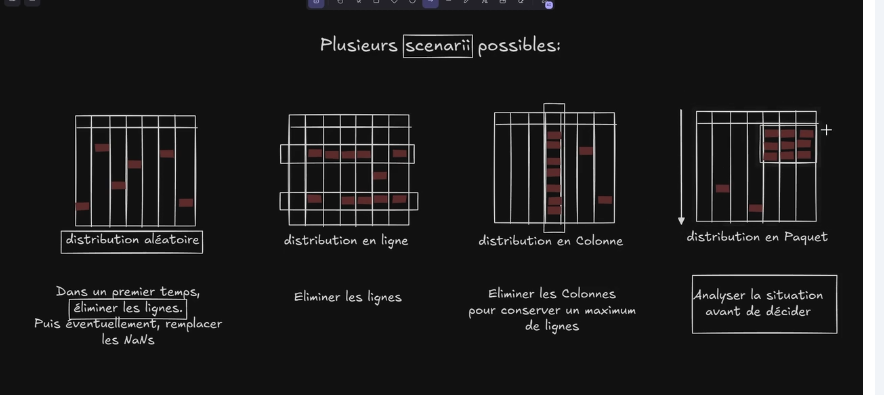

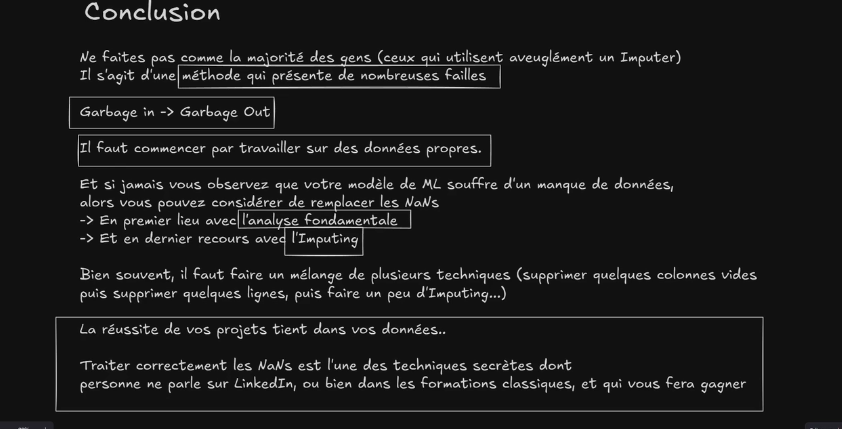

In [2]:
df = sns.load_dataset('titanic')
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [3]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [5]:
df.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

<Axes: >

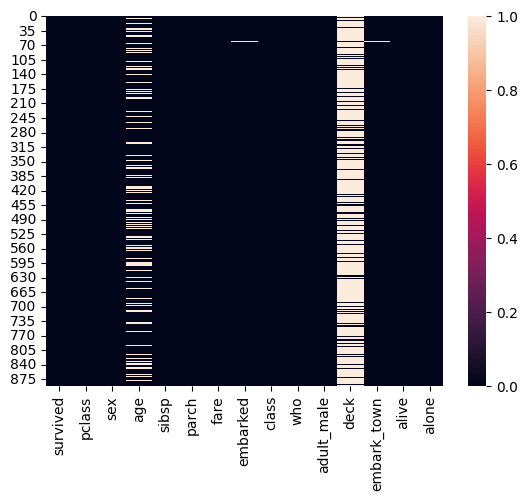

In [6]:
sns.heatmap(df.isna())

In [7]:
na_index=df[df.isna().any(axis=1)].index

In [8]:
df.drop(labels='deck',axis=1,inplace=True)

In [9]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,Cherbourg,yes,True


<Axes: >

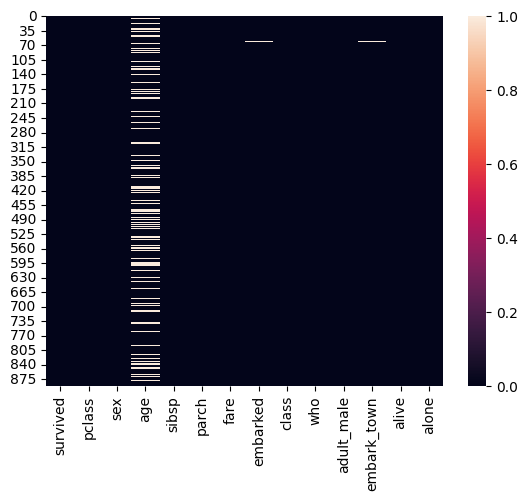

In [10]:
sns.heatmap(df.isna())

In [ ]:
df.dropna(axis=1,thresh=800,inplace=True)


# simple imputer et KnnImputer

In [12]:
from sklearn.impute import SimpleImputer,KNNImputer

In [13]:
df =sns.load_dataset('mpg')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [14]:
na_index2=df[df.isna().any(axis=1)].index

In [15]:
#simple imputer

imputer = SimpleImputer(strategy='most_frequent')
imputer.fit(df)



,missing_values,nan
,strategy,'most_frequent'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False


In [ ]:
#knn imputer
df_numeric = df.select_dtypes(include='number')

imputer2 = KNNImputer(n_neighbors=5)
imputer2.fit(df_numeric)


,missing_values,nan
,n_neighbors,5
,weights,'uniform'
,metric,'nan_euclidean'
,copy,True
,add_indicator,False
,keep_empty_features,False


In [17]:
imputer2.transform(df_numeric)

array([[  18. ,    8. ,  307. , ..., 3504. ,   12. ,   70. ],
       [  15. ,    8. ,  350. , ..., 3693. ,   11.5,   70. ],
       [  18. ,    8. ,  318. , ..., 3436. ,   11. ,   70. ],
       ...,
       [  32. ,    4. ,  135. , ..., 2295. ,   11.6,   82. ],
       [  28. ,    4. ,  120. , ..., 2625. ,   18.6,   82. ],
       [  31. ,    4. ,  119. , ..., 2720. ,   19.4,   82. ]],
      shape=(398, 7))

In [18]:
df2 = sns.load_dataset("tips")
df2

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [19]:
contingency_table = pd.crosstab(df2['size'],df2['day'])
contingency_table

day,Thur,Fri,Sat,Sun
size,,,,
1,1,1,2,0
2,48,16,53,39
3,4,1,18,15
4,5,1,13,18
5,1,0,1,3
6,3,0,0,1


In [20]:
from scipy.stats import chi2_contingency

chi2_contingency(contingency_table)

Chi2ContingencyResult(statistic=np.float64(29.632849936919712), pvalue=np.float64(0.013316478351860587), dof=15, expected_freq=array([[ 1.01639344,  0.31147541,  1.42622951,  1.24590164],
       [39.63934426, 12.14754098, 55.62295082, 48.59016393],
       [ 9.6557377 ,  2.95901639, 13.54918033, 11.83606557],
       [ 9.40163934,  2.88114754, 13.19262295, 11.52459016],
       [ 1.2704918 ,  0.38934426,  1.78278689,  1.55737705],
       [ 1.01639344,  0.31147541,  1.42622951,  1.24590164]]))

In [23]:
alpha = 0.02
p_value = chi2_contingency(contingency_table).pvalue

if p_value < alpha:
    print('on a suffisament delement pour rejetter H')
else:
    print("on a pas suffisament dhypothese pour rejeter H0")

on a suffisament delement pour rejetter H


# test_the Student

In [24]:
from scipy.stats import ttest_ind


In [25]:
df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [26]:
df.groupby("sex")['tip'].describe()

/tmp/ipykernel_255176/1591644023.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("sex")['tip'].describe()


,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
Male,157.0,3.089618,1.489102,1.0,2.0,3.00,3.76,10.0
Female,87.0,2.833448,1.159495,1.0,2.0,2.75,3.50,6.5


In [28]:
df_male = df.query("`sex`=='Male'")
df_Female = df.query("`sex`=='Female'")

alpha = 0.02

p_value = ttest_ind(df_male['tip'],df_Female['tip']).pvalue

if p_value < alpha:
    print(" on a suffisament dhipothese pour rejeter H")
else:
    print("on a pas suffisament dhipoyhese pour rejetter H0")

on a pas suffisament dhipoyhese pour rejetter H0


In [30]:
# Test de AnovA

from scipy.stats import f_oneway

df.groupby('day')['tip'].mean()


/tmp/ipykernel_255176/1346843961.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('day')['tip'].mean()


day
Thur    2.771452
Fri     2.734737
Sat     2.993103
Sun     3.255132
Name: tip, dtype: float64

In [31]:
df.groupby('day')['tip'].apply(list)

/tmp/ipykernel_255176/2697929385.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('day')['tip'].apply(list)


day
Thur    [4.0, 3.0, 2.71, 3.0, 3.4, 1.83, 5.0, 2.03, 5....
Fri     [3.0, 3.5, 1.0, 4.3, 3.25, 4.73, 4.0, 1.5, 3.0...
Sat     [3.35, 4.08, 2.75, 2.23, 7.58, 3.18, 2.34, 2.0...
Sun     [1.01, 1.66, 3.5, 3.31, 3.61, 4.71, 2.0, 3.12,...
Name: tip, dtype: object

In [33]:
alpha = 0.2
p_value = f_oneway(*df.groupby('day')['tip'].apply(list)).pvalue


if p_value < alpha:
    print("on a suffisament delement pour rejeter H0")
else:
    print("on a pas suffisament delement pour rejeter H0")

on a suffisament delement pour rejeter H0


/tmp/ipykernel_255176/605001763.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  p_value = f_oneway(*df.groupby('day')['tip'].apply(list)).pvalue


In [36]:
from scipy.stats import pearsonr

p_value = pearsonr(df['total_bill'],df['tip']).pvalue

alpha = 0.02


if p_value < alpha:
    print("on a suffisament dhipothese pour rejeter H0")
else:
    print("on a pas suffisament delement pour rejeter H0")

on a suffisament dhipothese pour rejeter H0


In [ ]:
#question 4
